# Pneumonia_Classification
### Using Chest X-rays: Bacterial pneumonia / Viral pneumonia / Normal

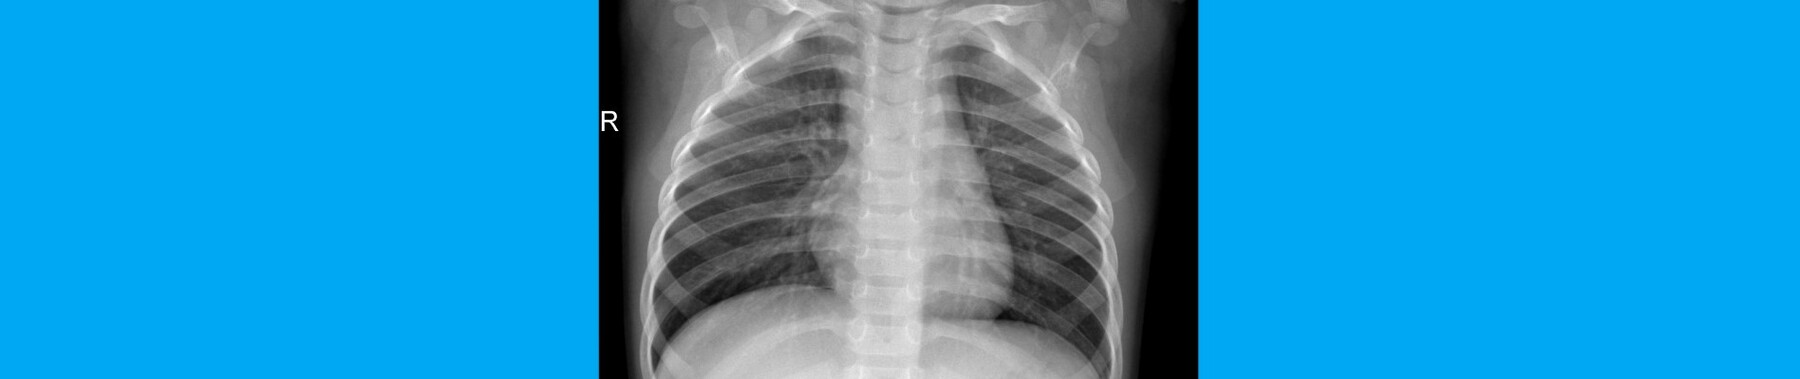
* We are using the data set available in kaggle for this project here is the [link](https://www.kaggle.com/datasets/kostasdiamantaras/chest-xrays-bacterial-viral-pneumonia-normal?sort=votes)

* All the rights are given to kaggel and author of the dataset we are just using the original dataset for learning purpose
* Official rights are reserved

In [65]:
#importing Basic necessary libraries
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


labels = pd.read_csv("labels_train.csv")

labels.head()


,file_name,class_id
0,img_4358977458434011046.jpg,1
1,img_5224016757187192130.jpg,2
2,img_3065202206106254707.jpg,2
3,img_6304894865561547174.jpg,1
4,img_3371338542810939877.jpg,2


In [12]:
#Some Sample Images to Check the Data set
sample_images = []
for file_name in labels["file_name"].sample(15):
    img = Image.open(os.path.join("train_images/train_images", file_name))
    print(f"Loading image with filename: {file_name}")
    sample_images.append(img)




Loading image with filename: img_5406261403036370194.jpg
Loading image with filename: img_4056090186990350747.jpg
Loading image with filename: img_314904065023767258.jpg
Loading image with filename: img_4680098615955784580.jpg
Loading image with filename: img_5315488356203633078.jpg
Loading image with filename: img_5156106217621725123.jpg
Loading image with filename: img_5488049286293489559.jpg
Loading image with filename: img_4092253942642808884.jpg
Loading image with filename: img_5685611094417657784.jpg
Loading image with filename: img_8690572737016852285.jpg
Loading image with filename: img_2927205532602297384.jpg
Loading image with filename: img_4532605763810510085.jpg
Loading image with filename: img_4981008670581187808.jpg
Loading image with filename: img_98937135460402514.jpg
Loading image with filename: img_4338599431052746973.jpg


# Visualizing Sample Images from each Class of 0,1,2

* Class 0: Normal 
* Class 1: Bacterial 
* Class 2: Viral

Image filename: img_921569670635096453.jpg
Image filename: img_3367557047839086523.jpg
Image filename: img_587949291086480234.jpg
Image filename: img_7713078751307647449.jpg
Image filename: img_7729387390393392297.jpg
Image filename: img_5873675870124788605.jpg
Image filename: img_8364572501513307086.jpg
Image filename: img_4212954049487480879.jpg
Image filename: img_4414962635845682920.jpg
Image filename: img_2922899165593726222.jpg
Image filename: img_8150527744869396348.jpg
Image filename: img_5485076804926459686.jpg
Image filename: img_8730909423574688496.jpg
Image filename: img_5485491741420840851.jpg
Image filename: img_1042143861289473280.jpg


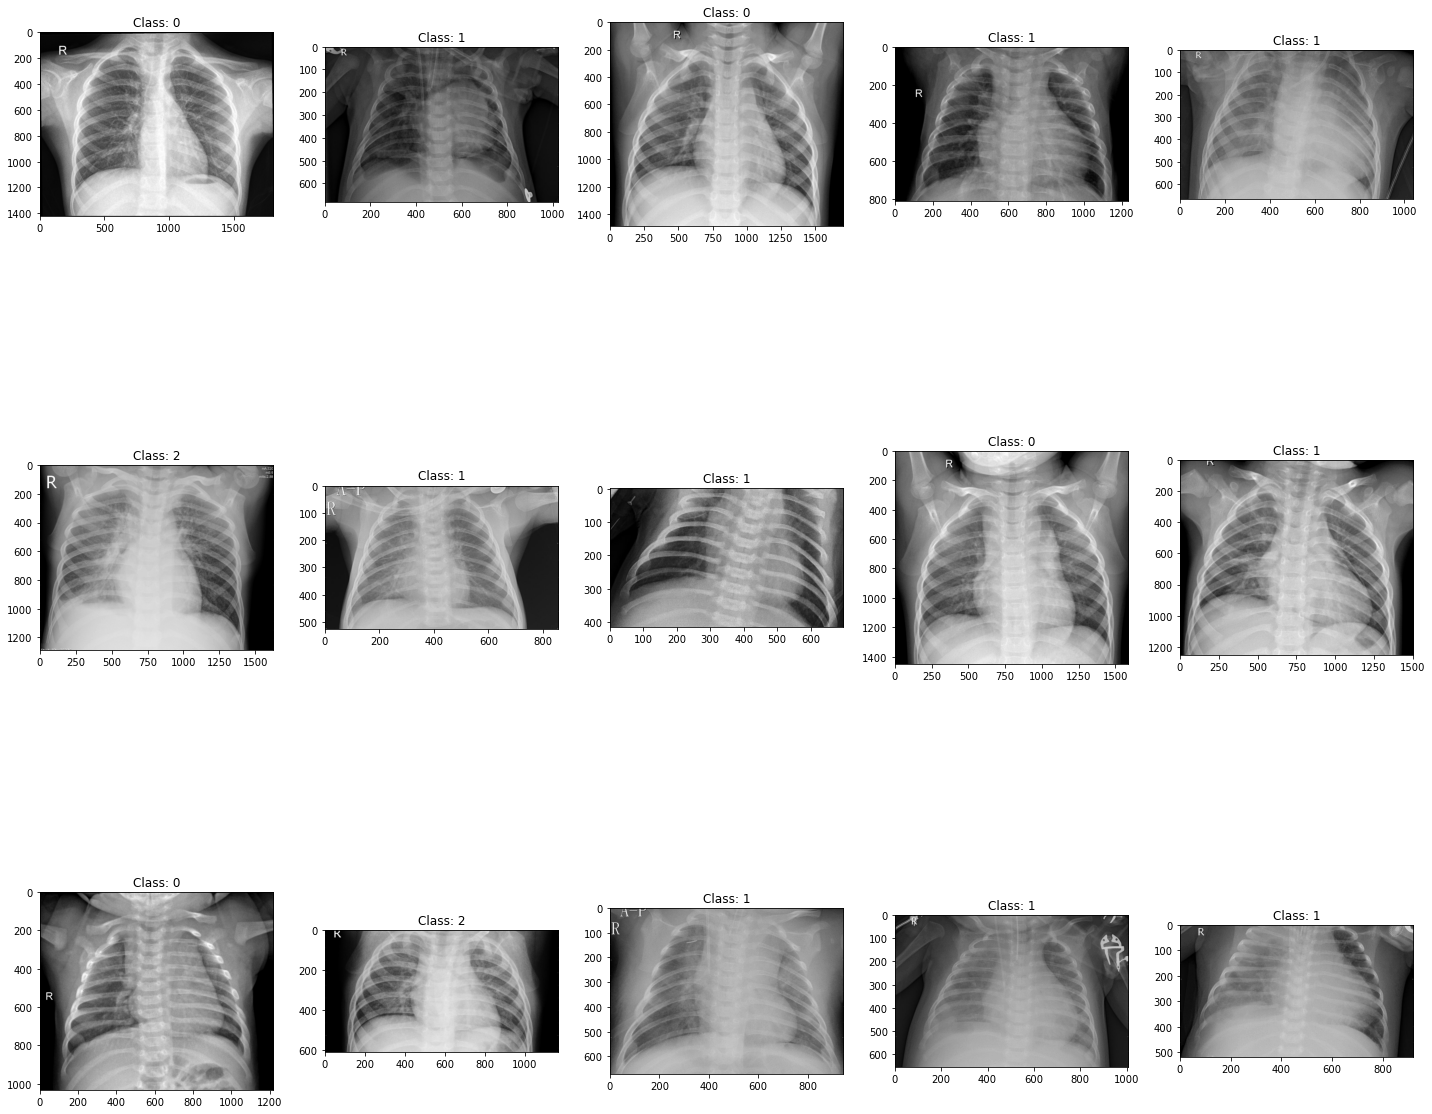

In [11]:
# Plotting  sample images to see the given Data Set
fig, axs = plt.subplots(3, 5, figsize=(20, 20)) 

for i, img in enumerate(sample_images):
    filename = img.filename.split('/')[-1].split('\\')[-1]
    print(f"Image filename: {filename}")  
    label_row = labels.loc[labels['file_name'] == filename]
    if label_row.empty:
        print(f"No label found for image: {filename}")
        axs[i//5, i%5].set_title("No label")
    else:
        axs[i//5, i%5].set_title(f"Class: {label_row['class_id'].values[0]}")
    axs[i//5, i%5].imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

# Count the number of images per class

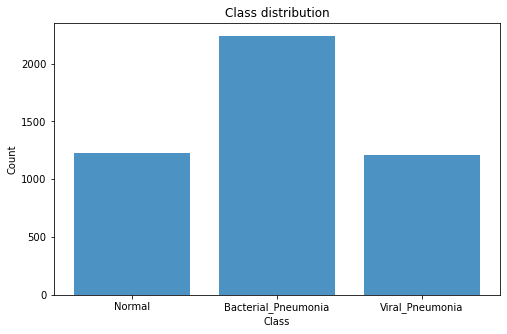

In [66]:

class_counts = labels['class_id'].value_counts()

# Plotting the class distribution of different Pneumonia
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, alpha=0.8)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Normal', 'Bacterial_Pneumonia', 'Viral_Pneumonia'])
plt.show()


# Get dimensions of all images

In [18]:
#Dimensions information about the given images in the data set
dimensions = []
for file_name in labels['file_name']:
    img = Image.open(os.path.join("train_images/train_images", file_name))
    dimensions.append(img.size)


dimensions_df = pd.DataFrame(dimensions, columns=['width', 'height'])


print(dimensions_df.describe())


             width       height
count  4672.000000  4672.000000
mean   1325.591396   967.857235
std     363.744792   382.418506
min     384.000000   127.000000
25%    1056.000000   688.000000
50%    1280.000000   880.000000
75%    1560.000000  1184.000000
max    2916.000000  2713.000000


This will help us understand about the size and aspect ratio of our images, which may be important when it comes to preprocessing of image steps like resizing and normalization.

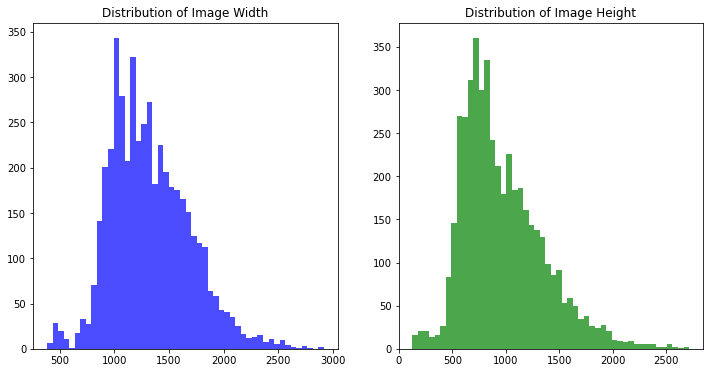

In [19]:
# Plotting the distribution of image dimensions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#using subplots for side by side plotting
axs[0].hist(dimensions_df['width'], bins=50, color='blue', alpha=0.7)
axs[0].set_title('Distribution of Image Widths')
axs[1].hist(dimensions_df['height'], bins=50, color='green', alpha=0.7)
axs[1].set_title('Distribution of Image Heights')
plt.show()


* Observation: The Distribution of dimensions of the images are slightly Skewed to left


## Examine the correlation between image size and class labels: This could reveal whether image dimensions have an effect on the image class.

In [22]:

labels['width'] = [Image.open(os.path.join("train_images/train_images", file_name)).size[0] for file_name in labels['file_name']]
labels['height'] = [Image.open(os.path.join("train_images/train_images", file_name)).size[1] for file_name in labels['file_name']]

# Calculating the  correlations
correlations = labels[['class_id', 'width', 'height']].corr()



<IPython.core.display.Javascript object>

<AxesSubplot:>

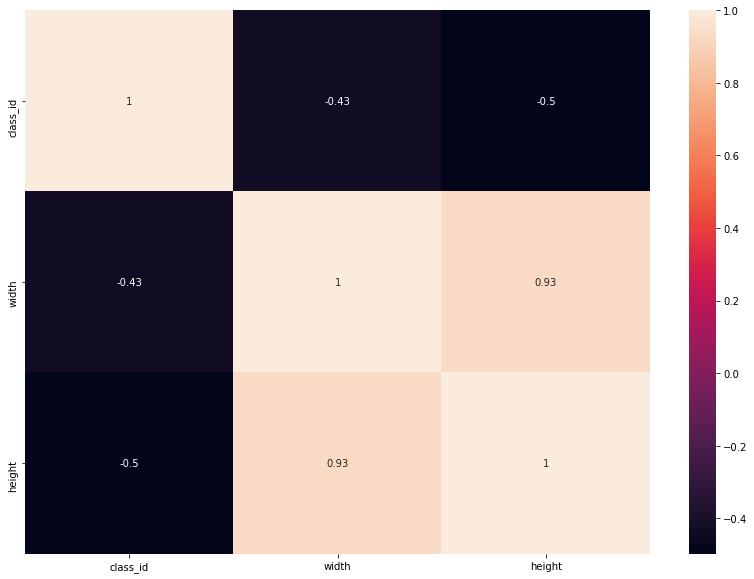

In [63]:
plt.figure(figsize=(14,10))
sns.heatmap(correlations,annot=True)

In [32]:
# We have taken for small Sample only since it is computationally expensive

In [28]:
# Function to calculate average pixel intensity for each image
def calculate_avg_intensity(image_paths):
    avg_intensities = []
    for image_path in image_paths:
        img = Image.open(image_path)
        avg_intensity = np.mean(img.getdata())
        avg_intensities.append(avg_intensity)
    return avg_intensities

# Calculate average pixel intensity for each image in the dataset
intensity = calculate_avg_intensity([os.path.join("train_images/train_images", file_name) for file_name in labels['file_name'].sample(100)])




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* This is calculated just to see how the pixel intensity is varying on a overall sample to understand the data

<IPython.core.display.Javascript object>

2023-08-01 12:08:51,119 [2500] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



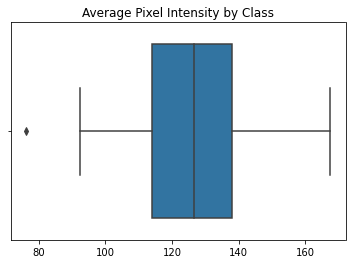

In [31]:
# Plot average pixel intensities by class
sns.boxplot(intensity)
plt.title('Average Pixel Intensity by Class')
plt.suptitle('')
plt.show()

# Image Resizing

In [33]:


def resize_images(directory, new_size=(224, 224)):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # adjust this if you have other file types
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img_resized = img.resize(new_size)
            img_resized.save(img_path)  # overwrite the original image

resize_images("train_images/train_images")


# Sample Images After resizing

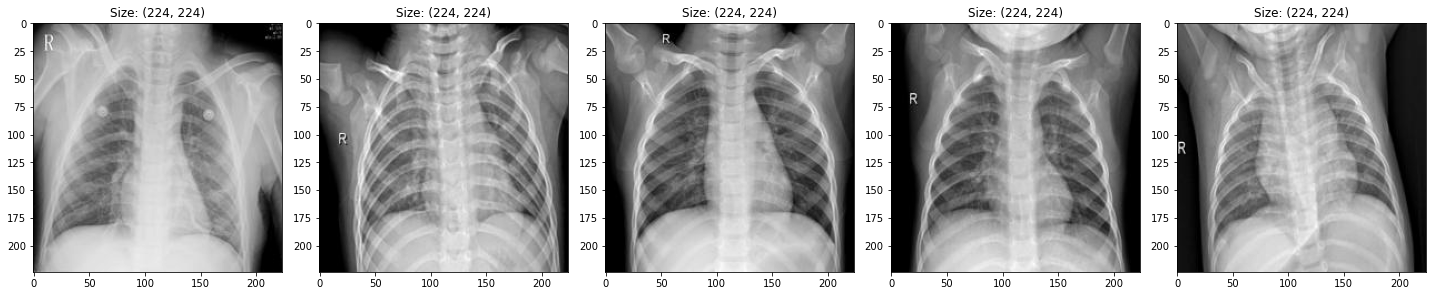

In [35]:
# Loading sample images to check sizing scale
sample_images = []
for file_name in labels["file_name"].sample(5):
    img = Image.open(os.path.join("train_images/train_images", file_name))
    sample_images.append(img)

# Plotting the  sample images using subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, img in enumerate(sample_images):
    # using gray cmap
    axs[i].imshow(img, cmap="gray")
    axs[i].set_title(f"Size of image: {img.size}")
plt.tight_layout()
plt.show()


# Normalizing the images

Normalize pixel values to the range [0, 1]. This helps the model converge faster and achieve better performance.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load a few sample images
sample_images = []
for file_name in labels["file_name"]:
    img = Image.open(os.path.join("train_images/train_images", file_name))
    img_normalized = np.array(img) / 255.0  # normalize pixel values to [0, 1]
    sample_images.append(img_normalized)




# Sample images after normalization

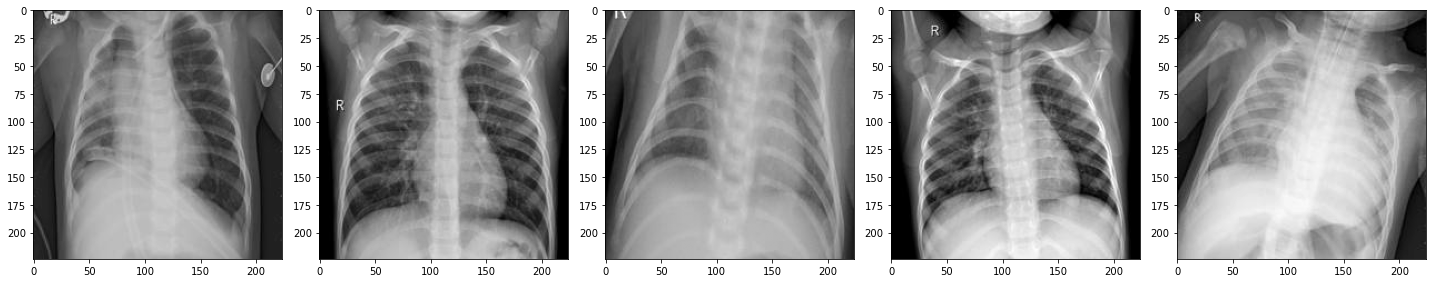

In [37]:
# Plotting sample images after normalization
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, img in enumerate(sample_images):
    axs[i].imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

# Histogram Equalization of the images:

Histogram equalization can be used to improve the contrast of an image by redistributing the intensity values so that they span the full range of the histogram. This can be particularly useful in medical imaging tasks to highlight areas of interest.

In [39]:

from skimage import exposure

def equalize_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img_array = np.array(img)
            # applying histogram equalization for intensity contrast
            img_equalized = exposure.equalize_hist(img_array)  
            # converting back to PIL images
            img_equalized = Image.fromarray((img_equalized * 255).astype(np.uint8))  
            #this will overwrite the actual image path
            img_equalized.save(img_path)  

equalize_images("train_images/train_images")


2023-08-01 12:31:17,864 [2500] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sriharsha\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)



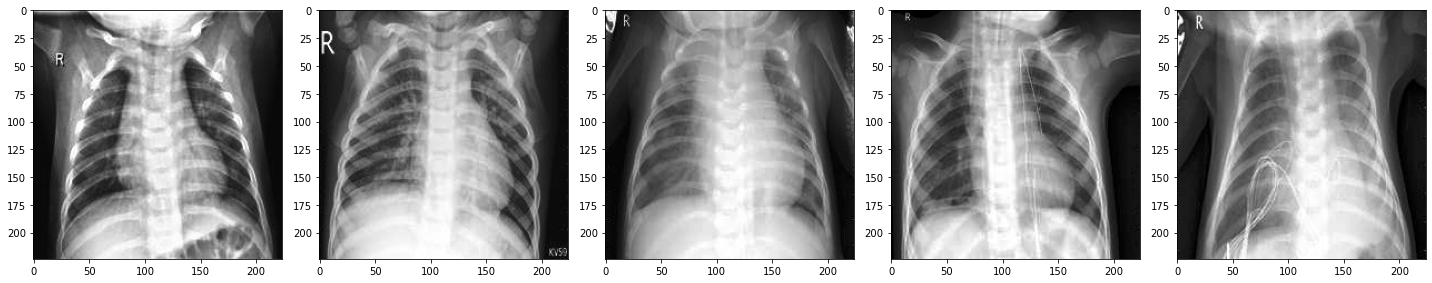

In [40]:
sample_images = []
for file_name in labels["file_name"].sample(5):
    img = Image.open(os.path.join("train_images/train_images", file_name))
    sample_images.append(np.array(img))

# Plotting sample images after histogram equalization
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, img in enumerate(sample_images):
    axs[i].imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

# Image Denoising:
Since the Data is related to X ray Data sets there is a high possibility of noise addition in the data set

* It is recommended to use **GPU** for this denoising task as it is computationally expensive for normal CPU's

In [67]:

from skimage import restoration

def denoise_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img_array = np.array(img)
            img_denoised = restoration.denoise_nl_means(img_array, h=10, fast_mode=True) 
            img_denoised = Image.fromarray((img_denoised * 255).astype(np.uint8))  

denoise_images("train_images/train_images")


# Building the basic Model Architecture of CNN

In [42]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Building the model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)), 
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
])

# Model Compilation
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [47]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


labels_df = pd.read_csv('labels_train.csv')
labels = labels_df['class_id'].values

num_classes = 3  
labels = to_categorical(labels, num_classes)

# Loading the images  along with labels
images = []
for file_name in labels_df['file_name']:
    img = load_img(os.path.join('train_images/train_images', file_name), target_size=(224, 224), color_mode='grayscale')
    img = img_to_array(img) / 255.0  
    images.append(img)
images = np.array(images)


#  `images`: a numpy array  (num_images, 224, 224, 1) contains preprocessed images
# `labels`: a numpy array  (num_images, num_classes) contains your one-hot encoded labels


In [48]:
# Training the CNN model
history = model.fit(images, labels, batch_size=32, epochs=10)

Epoch 1/10
146/146 [==============================] - 154s 1s/step - loss: 0.9165 - accuracy: 0.6607
Epoch 2/10
146/146 [==============================] - 153s 1s/step - loss: 0.5650 - accuracy: 0.7650
Epoch 3/10
146/146 [==============================] - 154s 1s/step - loss: 0.4836 - accuracy: 0.8018
Epoch 4/10
146/146 [==============================] - 148s 1s/step - loss: 0.4155 - accuracy: 0.8286
Epoch 5/10
146/146 [==============================] - 518s 4s/step - loss: 0.3464 - accuracy: 0.8568
Epoch 6/10
146/146 [==============================] - 147s 1s/step - loss: 0.2799 - accuracy: 0.8876
Epoch 7/10
146/146 [==============================] - 148s 1s/step - loss: 0.2261 - accuracy: 0.9118
Epoch 8/10
146/146 [==============================] - 163s 1s/step - loss: 0.1759 - accuracy: 0.9298
Epoch 9/10
146/146 [==============================] - 158s 1s/step - loss: 0.1393 - accuracy: 0.9454
Epoch 10/10
146/146 [==============================] - 151s 1s/step - loss: 0.1106 - accura

In [52]:

from sklearn.model_selection import train_test_split



df = pd.read_csv('labels_train.csv')

# Splitting the DataFrame into  train set and test set with 80% train and 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  

num_classes = 3  
train_labels = to_categorical(train_df['class_id'], num_classes)
test_labels = to_categorical(test_df['class_id'], num_classes)

#Training set of images
train_images = []
for file_name in train_df['file_name']:
    img = load_img(os.path.join('train_images/train_images', file_name), target_size=(224, 224), color_mode='grayscale')
    img = img_to_array(img) / 255.0  
    train_images.append(img)
train_images = np.array(train_images)

#Testing Set
test_images = []
for file_name in test_df['file_name']:
    img = load_img(os.path.join('train_images/train_images', file_name), target_size=(224, 224), color_mode='grayscale')
    img = img_to_array(img) / 255.0 
    test_images.append(img)
test_images = np.array(test_images)




In [ ]:

#model.fit(train_images, train_labels, epochs=15)  




In [54]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

30/30 [==============================] - 81s 3s/step - loss: 0.0409 - accuracy: 0.9861
Test loss: 0.04093319922685623
Test accuracy: 0.9860962629318237


# Transfer learning Approach:

Transfer learning is machine learning method where a pre-trained model is used as the starting point.Generally, For image classification tasks, a common approach is to take a pre-trained model (usually trained on the large-scale ImageNet dataset) and fine-tune it for the specific task. But the most of the IMAGENET based models are trained on RGB images which is not the case for this model since we have X-ray images which are in GreyScale we have to do some manipulations to the pre-trained model.

Here we are 
modifying a pre-trained model to accept grayscale images requires **replacing the first layer of the model with a new layer that accepts grayscale input**.

In [ ]:
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Load the VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Define a new model
# model = Sequential()

# # Add a new input layer
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1), name='block1_conv1'))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# # Add the rest of the layers from the base model
# for layer in base_model.layers[3:]:
#     model.add(layer)

# # Freeze the layers so their weights will not be updated during training
# for layer in model.layers:
#     layer.trainable = False

# # Add new classification layers
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(3, activation='softmax'))  # number of classes



## Training and testing images set for pretrained model.

In [60]:

train_images = []
for file_name in train_df['file_name']:
    img = load_img(os.path.join('train_images/train_images', file_name), target_size=(224, 224), color_mode='grayscale')
    img = img_to_array(img) / 255.0 
    img = np.repeat(img, 3, axis=-1)  
    train_images.append(img)
train_images = np.array(train_images)


test_images = []
for file_name in test_df['file_name']:
    img = load_img(os.path.join('train_images/train_images', file_name), target_size=(224, 224), color_mode='grayscale')
    img = img_to_array(img) / 255.0 
    img = np.repeat(img, 3, axis=-1)  
    test_images.append(img)
test_images = np.array(test_images)


In [61]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a new model
model = Sequential()

# Add the base model
model.add(base_model)

# Add new classification layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # number of classes

# Freezing the layers of the base model
for layer in base_model.layers:
    layer.trainable = False




* **It is recommended to use GPU for training the Pre-trained model as it is computationally expensive**

In [62]:
# Model Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()

# Train the model
model.fit(train_images, train_labels, epochs=10)  # adjust number of epochs as needed

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,138,243
Trainable params: 6,423,555
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
 88/117 [=====================>........] - ETA: 1:37:51 - loss: 0.8480 - accuracy: 0.7173

KeyboardInterrupt: 